In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Data Loading**

In [91]:
from google.colab import drive
drive.mount('/content/drive/')
test_path = '/content/drive/MyDrive/Pattern Lab Data/test_knn.txt';
train_path = '/content/drive/MyDrive/Pattern Lab Data/train_knn.txt';

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [92]:
train_data = pd.read_csv(train_path,sep=",", header=None)
test_data = pd.read_csv(test_path,sep=",", header=None)

###**Assignment Part 1: Train Data Plotting**###

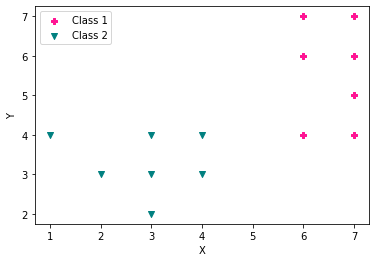

In [93]:
X = train_data[0]
Y = train_data[1]
cls = train_data[2]
cl_1 = 0
cl_2 = 0
for i in range(len(X)):
  if cls[i] == 1:
    clr = 'deeppink'
    mark='P'
  else:
    clr = 'teal'
    mark='v'
  if clr == 'deeppink' and cl_1==0:
    cl_1=1
    plt.scatter(X[i],Y[i],label = "Class 1",color = clr,marker=mark)
    continue
  if clr == 'teal' and cl_2 == 0:
    cl_2=1
    plt.scatter(X[i],Y[i],label = "Class 2",color = clr,marker=mark)
    continue
  plt.scatter(X[i],Y[i],color = clr,marker=mark)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

In [94]:
train_data = np.array(train_data)
test_data = np.array(test_data)

**Taking value of K**

In [95]:
k = int(input("Enter The Number of nearest neighbors: "))

Enter The Number of nearest neighbors: 5


###**Assignment Part 3: Implementing KNN Algorithm and Plotting The Test Data According to Predicted Class**###

In [96]:
def square_distance(a,b,x,y):
  return np.square(a-x)+np.square(b-y)

In [97]:
def knn(x,y,printData):
  distance = []
  for i in range(len(train_data)):
    val = int(square_distance(x,y,train_data[i][0],train_data[i][1]))
    distance.append((train_data[i][2], val))
  
  distance.sort(key=lambda x:x[1])
  cnt = 0
  if printData == 1:
    print("Test point:",x,y)
  for i in range(k):
    if printData == 1:
      print("Distance",i+1,":",distance[i][1],end="\t\t")
      print("Class:",distance[i][0])
    if(distance[i][0] == 1):
      cnt+=1
    else:
      cnt-=1
  cls = 1
  
  if cnt>0:
    if printData == 1:
      print("Predicted Class: 1")
      print('')
  else:
    if printData == 1:
      print("Predicted Class: 2")
      print('')
    cls = 2
  
  return cls

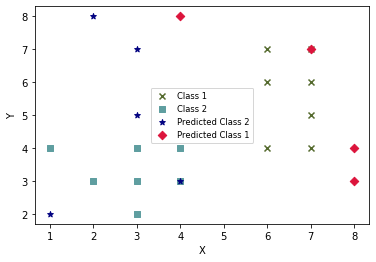

In [98]:
X = train_data[:,0]
Y = train_data[:,1]
cls = train_data[:,2]
cl_1 = 0
cl_2 = 0
for i in range(len(train_data)):
  if cls[i] == 1:
    clr = 'darkolivegreen'
    mark='x'
  else:
    clr = 'cadetblue'
    mark='s'
  if clr == 'darkolivegreen' and cl_1==0:
    cl_1=1
    plt.scatter(X[i],Y[i],label = "Class 1",color = clr,marker=mark)
    continue
  if clr == 'cadetblue' and cl_2 == 0:
    cl_2=1
    plt.scatter(X[i],Y[i],label = "Class 2",color = clr,marker=mark)
    continue
  plt.scatter(X[i],Y[i],color = clr,marker=mark)


cl_1 = 0
cl_2 = 0
for i in range(len(test_data)):
  p1 = test_data[i][0]
  p2 = test_data[i][1]
  pr_cls = knn(p1,p2,0)
  if pr_cls == 1:
    clr = 'crimson'
    mark='D'
  else:
    clr = 'navy'
    mark='*'
  if clr == 'crimson' and cl_1==0:
    cl_1=1
    plt.scatter(p1,p2,label = "Predicted Class 1",color = clr,marker=mark)
    continue
  if clr == 'navy' and cl_2 == 0:
    cl_2=1
    plt.scatter(p1,p2,label = "Predicted Class 2",color = clr,marker=mark)
    continue
  plt.scatter(p1,p2,color = clr,marker=mark)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc="best",fontsize = "small")
plt.show()

###**Assignment Part 3: Printing Top K Distances Along with Their Class Labels and Predicted Class for Each Test Data.**###





In [99]:
for i in range(len(test_data)):
  p1 = test_data[i][0]
  p2 = test_data[i][1]
  pr_cls = knn(p1,p2,1)

Test point: 3 7
Distance 1 : 9		Class: 1
Distance 2 : 9		Class: 2
Distance 3 : 10		Class: 1
Distance 4 : 10		Class: 2
Distance 5 : 13		Class: 2
Predicted Class: 2

Test point: 7 7
Distance 1 : 0		Class: 1
Distance 2 : 1		Class: 1
Distance 3 : 1		Class: 1
Distance 4 : 2		Class: 1
Distance 5 : 4		Class: 1
Predicted Class: 1

Test point: 4 3
Distance 1 : 0		Class: 2
Distance 2 : 1		Class: 2
Distance 3 : 1		Class: 2
Distance 4 : 2		Class: 2
Distance 5 : 2		Class: 2
Predicted Class: 2

Test point: 2 8
Distance 1 : 17		Class: 1
Distance 2 : 17		Class: 2
Distance 3 : 17		Class: 2
Distance 4 : 20		Class: 1
Distance 5 : 20		Class: 2
Predicted Class: 2

Test point: 3 5
Distance 1 : 1		Class: 2
Distance 2 : 2		Class: 2
Distance 3 : 4		Class: 2
Distance 4 : 5		Class: 2
Distance 5 : 5		Class: 2
Predicted Class: 2

Test point: 1 2
Distance 1 : 2		Class: 2
Distance 2 : 4		Class: 2
Distance 3 : 4		Class: 2
Distance 4 : 5		Class: 2
Distance 5 : 8		Class: 2
Predicted Class: 2

Test point: 4 8
Distance 1